In [1]:
# this notebook may be useful to solve Part 3 of the 
# CS413 coursework assignment 2023-24
import os
import glob


import numpy as np
import matplotlib.pyplot as plt

import xmltodict

import cv2

In [2]:
data_dir = '' # where you've put the cwk data files

annotations_dir = data_dir + 'ANNOTATIONS/'

# name the annotation file you want to load and show
xml_filename = annotations_dir + 'BOARD3-1.xml'


with open(xml_filename) as xml_file:
    data_dict = xmltodict.parse(xml_file.read())
    
    
# see what information we have in the data_dict
print(data_dict)
    


{'annotation': {'folder': 'BOARDS', 'filename': 'BOARD3-1.jpg', 'path': '/Users/abhir/Desktop/AOI/data/BOARDS/BOARD3-1.jpg', 'source': {'database': 'Unknown'}, 'size': {'width': '4032', 'height': '3024', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'enet', 'pose': 'Unspecified', 'truncated': '0', 'difficult': '0', 'bndbox': {'xmin': '2074', 'ymin': '1286', 'xmax': '2199', 'ymax': '1412'}}, {'name': 'regulator', 'pose': 'Unspecified', 'truncated': '0', 'difficult': '0', 'bndbox': {'xmin': '2475', 'ymin': '1670', 'xmax': '2658', 'ymax': '1825'}}, {'name': 'regulator', 'pose': 'Unspecified', 'truncated': '0', 'difficult': '0', 'bndbox': {'xmin': '2438', 'ymin': '1881', 'xmax': '2636', 'ymax': '2030'}}, {'name': 'osc1', 'pose': 'Unspecified', 'truncated': '0', 'difficult': '0', 'bndbox': {'xmin': '1449', 'ymin': '1049', 'xmax': '1604', 'ymax': '1221'}}, {'name': 'buck', 'pose': 'Unspecified', 'truncated': '0', 'difficult': '0', 'bndbox': {'xmin': '1279', 'ymin': '1115', 'xmax': '13

image_path BOARDS/BOARD3-1.jpg , width 4032 , height 3024
num of annotation objects 113
loaded image has shape (3024, 4032, 3)
bbox 0 , has label =  enet , bbox =  (2074, 1286, 2199, 1412)
bbox 1 , has label =  regulator , bbox =  (2475, 1670, 2658, 1825)
bbox 2 , has label =  regulator , bbox =  (2438, 1881, 2636, 2030)
bbox 3 , has label =  osc1 , bbox =  (1449, 1049, 1604, 1221)
bbox 4 , has label =  buck , bbox =  (1279, 1115, 1375, 1214)
bbox 5 , has label =  buck , bbox =  (1088, 1841, 1185, 1946)
bbox 6 , has label =  rect , bbox =  (1651, 1289, 1848, 1360)
bbox 7 , has label =  rect , bbox =  (1656, 1394, 1843, 1468)
bbox 8 , has label =  rect , bbox =  (1653, 1512, 1841, 1574)
bbox 9 , has label =  osc2 , bbox =  (2379, 1143, 2480, 1297)
bbox 10 , has label =  dac , bbox =  (1120, 1521, 1330, 1758)
bbox 11 , has label =  transistor , bbox =  (1912, 1669, 2008, 1756)
bbox 12 , has label =  con , bbox =  (1600, 1808, 1888, 2062)
bbox 13 , has label =  cap1 , bbox =  (1185, 1060,

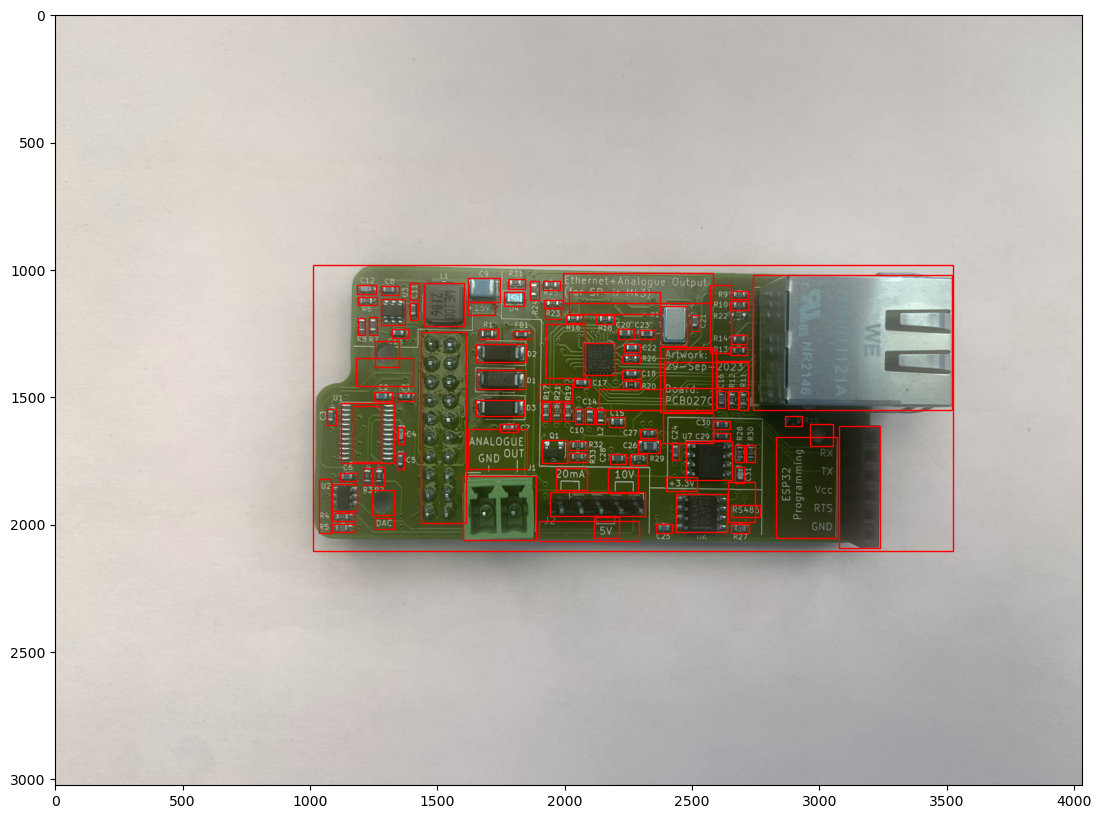

In [3]:
from matplotlib.patches import Rectangle

# tease out some information

# the image this file contains annotation for is...
# (note don't use 'path' as it's absolute to the creator)
folder = data_dict['annotation']['folder']
filename = data_dict['annotation']['filename']

image_path = data_dir + folder + '/' + filename
width = data_dict['annotation']['size']['width']
height = data_dict['annotation']['size']['height']

# these are a list of bbox annotations with labels, coordinates
objects = data_dict['annotation']['object']

print('image_path', image_path, ', width', width, ', height', height)
print('num of annotation objects', len(objects))


# load the image which is referred to in the annotation file
image = cv2.imread(image_path)
print('loaded image has shape', image.shape)


fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)

plt.imshow(image)

for i in range(len(objects)):
    
    label = objects[i]['name']
    bbox_info = objects[i]['bndbox'] 
    
    # need to make the coords into integers...
    bbox = (int(bbox_info['xmin']), 
            int(bbox_info['ymin']), 
            int(bbox_info['xmax']), 
            int(bbox_info['ymax'])) # bbox ntuple
    
    print('bbox', i, ', has label = ', label, ', bbox = ', bbox)
    
    # overlay the annotation as a rectangle
    ax.add_patch(Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1],
                 edgecolor = 'red',
                 facecolor = 'None',
                 fill=True,
                 lw=1))    
    
    
plt.show()